## Problem:

A retail industry is trying to discover if reducing their sale price will result in a better sales volume (by inccreasing their sale conversion).
They sent me a sheet with the produced quantity, sales quantity, sales volume and sales conversion percentage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
producaoXvendas = pd.read_csv('producaoXvendas.csv', sep=';')
producaoXvendas.head(10)

,cod,pauta,qtd_prd,qtd_fat,prc_giro,tot_venda,grupo,produto
0,158009,34.5,594,13,0.021886,447.94,SOBREPOSTO JEANS,CASACO
1,507009,25.0,661,2,0.003026,50.00,COMPRIDO JEANS,REGULAR
2,597009,25.0,368,1,0.002717,24.54,COMPRIDO JEANS,REGULAR
3,8020009,25.0,322,2,0.006211,49.54,COMPRIDO JEANS,CALCA
4,9052009,25.0,302,2,0.006623,49.74,COMPRIDO JEANS,REGULAR
5,9116009,25.0,206,1,0.004854,24.74,COMPRIDO JEANS,SKINNY
6,10162009,25.0,253,1,0.003953,25.00,COMPRIDO JEANS,SKINNY
7,10355009,25.0,448,15,0.033482,372.85,COMPRIDO JEANS,SKINNY
8,10402009,25.0,442,1,0.002262,24.54,COMPRIDO JEANS,SKINNY
9,10646009,25.0,497,3,0.006036,74.54,COMPRIDO JEANS,FLARE


In [3]:
producaoXvendas.describe()

,cod,pauta,qtd_prd,qtd_fat,prc_giro,tot_venda
count,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,1.318437e+07,131.950000,471.194444,389.279070,0.816407,50886.370310
std,1.056543e+06,32.293088,301.664334,286.119497,0.197943,37439.488628
min,1.580090e+05,20.000000,200.000000,1.000000,0.002262,24.540000
25%,1.241160e+07,109.000000,355.750000,246.000000,0.760807,28674.037500
50%,1.324701e+07,139.000000,426.500000,358.000000,0.893528,45772.410000
75%,1.399426e+07,149.000000,497.000000,451.500000,0.950274,64378.190000
max,1.470401e+07,279.000000,3818.000000,3542.000000,1.000000,382310.110000


In [4]:
producaoXvendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 8 columns):
cod          1548 non-null int64
pauta        1548 non-null float64
qtd_prd      1548 non-null int64
qtd_fat      1548 non-null int64
prc_giro     1548 non-null float64
tot_venda    1548 non-null float64
grupo        1548 non-null object
produto      1548 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 96.8+ KB


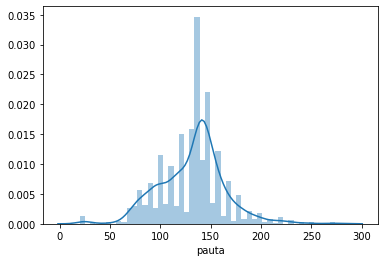

In [3]:
#checking the distribution of sales price
sns.distplot(producaoXvendas['pauta'], bins= 50)

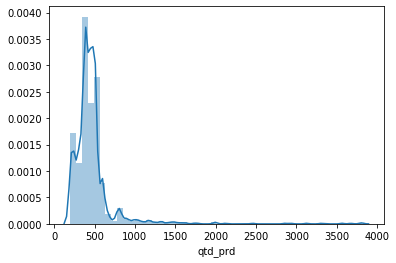

In [4]:
#checking the distribution of produced volume per product.
sns.distplot(producaoXvendas['qtd_prd'], bins=50)

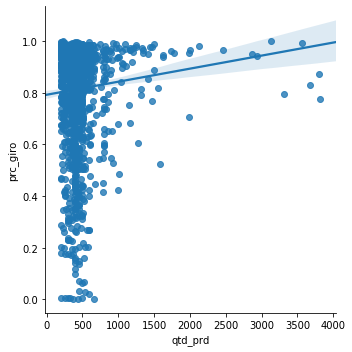

In [5]:
#checking the relationship between the produced and the sales conversion percentage.
sns.lmplot(x='qtd_prd', y='prc_giro', data=producaoXvendas)

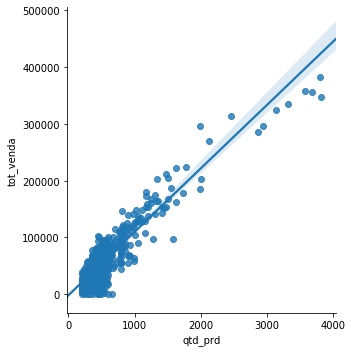

In [6]:
#between the produced and volume sold.
sns.lmplot(x='qtd_prd', y='tot_venda', data=producaoXvendas)

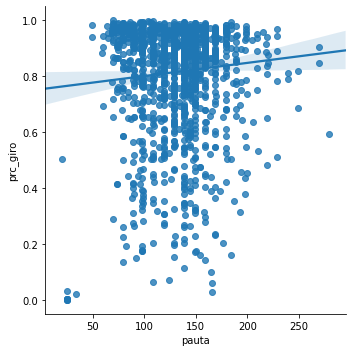

In [7]:
#sale price vs sale conversion percentage.
sns.lmplot(x='pauta', y='prc_giro', data=producaoXvendas)

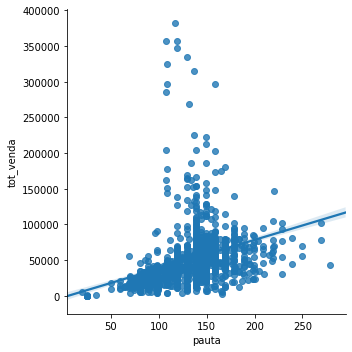

In [8]:
#sale price vs volume sold.
sns.lmplot(x='pauta', y='tot_venda', data=producaoXvendas)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
producaoXvendas.columns

Index(['cod', 'pauta', 'qtd_prd', 'qtd_fat', 'prc_giro', 'tot_venda', 'grupo',
       'produto'],
      dtype='object')

Text(0, 0.5, 'Predicted Y')

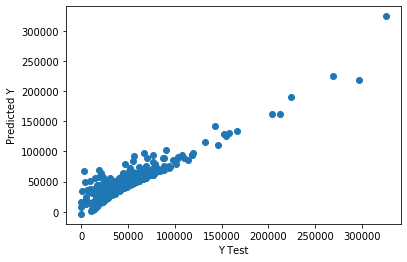

In [11]:
#splitting data into train data and test data, referencing sales volume.
y = producaoXvendas['tot_venda']
X = producaoXvendas[['pauta', 'qtd_prd']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()

#fitting the linear model into training data and getting predictions
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [12]:
#checking the error metrics.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9689.974752925044
MSE: 185172555.48250505
RMSE: 13607.812295975611


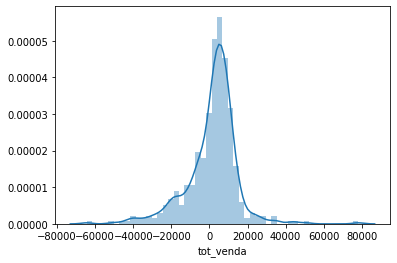

In [13]:
#checking the leavings.
sns.distplot((y_test - predictions), bins=50)

In [14]:
#checking the correlation coefficents
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
pauta,290.476816
qtd_prd,105.563632


Text(0, 0.5, 'Predicted Y')

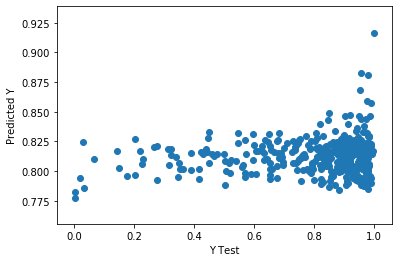

In [15]:
#splitting data into train data and test data, referencing sales conversion percentage.
y = producaoXvendas['prc_giro']
X = producaoXvendas[['pauta', 'qtd_prd']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()

#fitting the linear model into training data and getting predictions
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.15037627149026433
MSE: 0.04002783106220556
RMSE: 0.20006956555709707


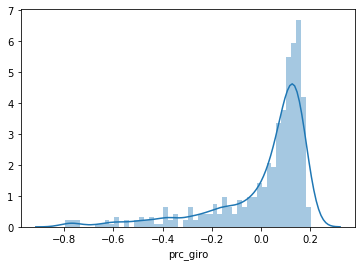

In [17]:
sns.distplot((y_test - predictions), bins=50)

In [18]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
pauta,0.000250
qtd_prd,0.000041


## Conclusions

There isn't any linear relationship between the sale price and the sales conversion percentage or the sales ammount, but there is a relationship between the produced volume and the sales ammount.
I guess the company should consider increase volume produced per product.